In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [2]:
# downloaded from:
# http://www.nature.com/nature/journal/v542/n7642/fig_tab/nature21360_F1.html
file = 'nature21360-f1.csv'

In [3]:
df = pd.read_csv(file, names=['time', 'flux', 'error'], skiprows=1)
# time = BJD(TDB)-2450000

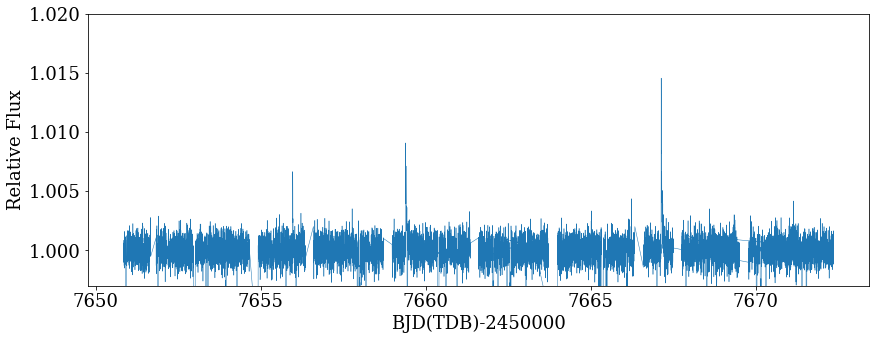

In [4]:
plt.figure(figsize=(14,5))
plt.plot(df['time'], df['flux'], lw=0.5);
plt.ylim(.997,1.02);
plt.xlabel('BJD(TDB)-2450000');
plt.ylabel('Relative Flux');

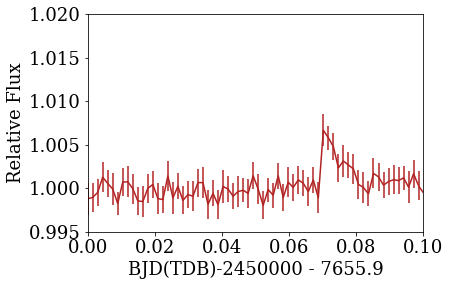

In [5]:
plt.errorbar(df['time'] - 7655.9, df['flux'], df['error'], c='FireBrick');
plt.xlim(0,0.1);
plt.ylim(.995,1.02);
plt.xlabel('BJD(TDB)-2450000 - 7655.9');
plt.ylabel('Relative Flux');
plt.savefig('trappist1_flare1.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

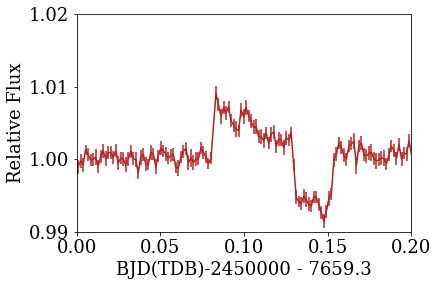

In [6]:
plt.errorbar(df['time'] - 7659.3, df['flux'], df['error'], c='FireBrick');
plt.xlim(0,0.2);
plt.ylim(.99,1.02);
plt.xlabel('BJD(TDB)-2450000 - 7659.3');
plt.ylabel('Relative Flux');
plt.savefig('trappist1_flare2.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

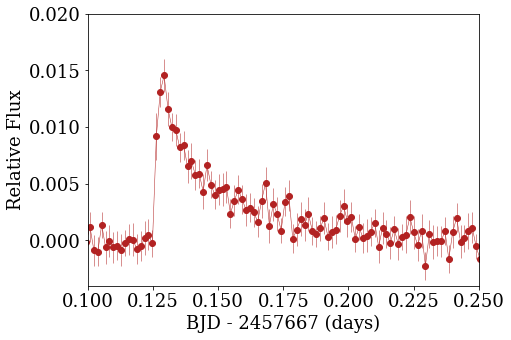

In [7]:
plt.figure(figsize=(7,5))
plt.errorbar(df['time']-7667, df['flux']-1, df['error'], c='FireBrick', marker='o', lw=0.5);
plt.xlim(0.1,.25);
plt.ylim(-.004,.02);
plt.xlabel('BJD - 2457667 (days)');
plt.ylabel('Relative Flux');
plt.savefig('trappist1_flare3.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)

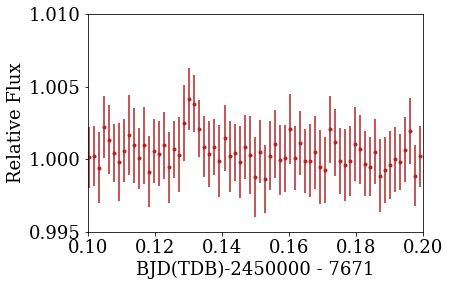

In [8]:
# A 4th little flare
plt.errorbar(df['time']-7671, df['flux'], df['error'], marker='.', linestyle='none', c='FireBrick');
plt.xlim(.1,.2);
plt.ylim(.995,1.01);
plt.xlabel('BJD(TDB)-2450000 - 7671');
plt.ylabel('Relative Flux');
plt.savefig('trappist1_flare4.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

In [9]:
# fit each flare w/ aflare model, also compute energy (Equivalent Duration)
tstart = [7655.968, 7659.375, 7667.12, 7671.122]
tstop = [7655.98,7659.42,7667.23, 7671.14]

ed = np.zeros_like(tstart)
for k in range(len(tstart)):
    x = np.where((df['time'] >= tstart[k]) & (df['time'] <= tstop[k]))
    ed[k] = np.trapz(df['flux'].values[x]-1, x=(df['time'].values[x] * 86400.))

print(ed)

[  3.33917778  16.64022161  28.58649594   1.9874659 ]


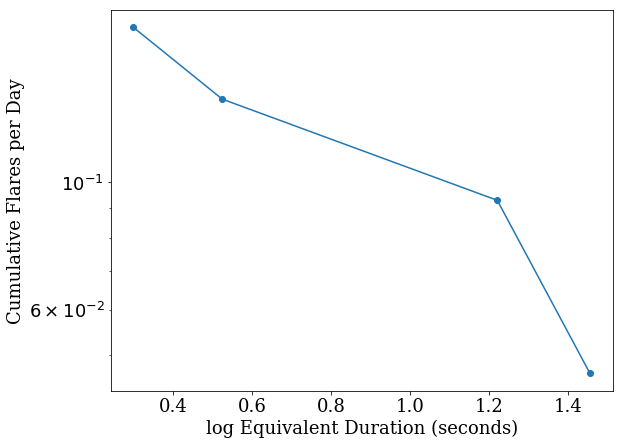

In [10]:
# now plot a Flare Frequency Distribution (FFD)

exptime = np.median(df['time'].values[1:] - df['time'].values[0:-1])
# totdur = len(df) * exptime
totdur = np.nanmax(df['time'].values) - np.nanmin(df['time'].values)

ffd_x = np.log10(ed[np.argsort(ed)])
ffd_y = (np.arange(len(ffd_x))[::-1] + 1) / totdur

plt.figure(figsize=(9,7))
plt.plot(ffd_x, ffd_y, '-o')
plt.yscale('log')
plt.xlabel('log Equivalent Duration (seconds)')
plt.ylabel('Cumulative Flares per Day')

In [11]:
'''
do some very rough conversions of Kepler FFD into IR, using the following terrible assumptions:
1) that Trappist-1 is an M6 (it's not)
2) that that Spitzer's 3.6micron filter is actually 2MASS Ks-band (it's not)
3) that Kepler's filter is actually SDSS r-band (it's not)

this allows me to use the Flare model from Davenport+2012 to put the FFDs on the same plot
''';

In [12]:
from FlareGrid.flaregrid import flaregrid

dmag = 0.01 # 0.01 magnitudes, close to 0.01 flux (small # approximation)
spt = 6 # M6
filt = 'K' # which band the flare was "observed" in
flaregrid(dmag, filter=filt, sptype=spt)

[5.493840846490198,
 2.488998650615977,
 1.1516494191451352,
 0.2731564494143396,
 0.08655174459354428,
 0.024174217300327976,
 0.01392640683143765,
 0.01]

In [13]:
approx_kep = np.zeros_like(df['flux'].values)

# m_obs - m_ref = -2.5 log10 (I_obs / I_ref)
for k in range(len(approx_kep)):
    approx_kep[k] = 10.**(flaregrid(2.5 * np.log10(df['flux'].values[k]), filter=filt, sptype=spt)[2] / 2.5)

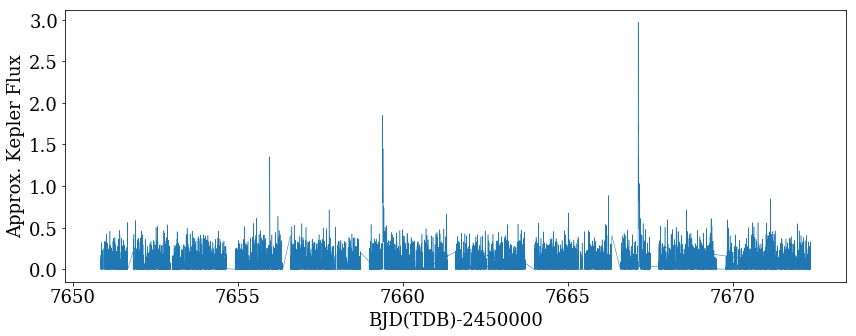

In [14]:
plt.figure(figsize=(14,5))
plt.plot(df['time'], approx_kep-1, lw=0.5);
plt.xlabel('BJD(TDB)-2450000');
plt.ylabel('Approx. Kepler Flux');


In [15]:
# tsort = np.argsort(df['time'])
# for k in range(np.size(tstart)):
#     plt.figure()
#     plt.plot(df['time'][tsort], approx_kep[tsort]-1, '-o');
#     plt.xlim(tstart[k] - 0.1, tstop[k] + 0.1)
#     plt.show()

In [16]:
ed2 = np.zeros_like(tstart)
for k in range(len(tstart)):
    x = np.where((df['time'] >= tstart[k]) & (df['time'] <= tstop[k]))
    ed2[k] = np.trapz(approx_kep[x]-1, x=(df['time'].values[x] * 86400.))

ffd_x2 = np.log10(ed2[np.argsort(ed2)])
ffd_y2 = (np.arange(len(ffd_x))[::-1] + 1) / totdur

# plt.figure(figsize=(9,7))
# plt.plot(ffd_x2, ffd_y2, '-o')
# plt.yscale('log')
# plt.xlabel('log Equivalent Duration (seconds) [approx. K2]')
# plt.ylabel('Cumulative Flares per Day')

In [17]:
ffd_x_k2 = [ 3.33008019,  2.32588959,  2.03282392,  2.01450643,  1.9913568 ,
        1.93318732,  1.93258868,  1.85773531,  1.68949689,  1.68909129,
        1.67922248,  1.50589332,  1.3848555 ,  1.30293433,  1.24594633,
        1.23384318,  1.19970519,  1.19163573,  1.17936295,  1.14334573,
        1.1238764 ,  1.1120607 ,  1.04698738,  1.02163114,  1.00641377,
        0.97924973,  0.93394374,  0.87927325,  0.8256979 ,  0.82501379,
        0.76418095,  0.75212438,  0.58478914,  0.3296837 , -0.48223946]
ffd_y_k2 = [ 0.01347242,  0.02694485,  0.04041727,  0.05388969,  0.06736212,
        0.08083454,  0.09430697,  0.10777939,  0.12125181,  0.13472424,
        0.14819666,  0.16166908,  0.17514151,  0.18861393,  0.20208635,
        0.21555878,  0.2290312 ,  0.24250363,  0.25597605,  0.26944847,
        0.2829209 ,  0.29639332,  0.30986574,  0.32333817,  0.33681059,
        0.35028301,  0.36375544,  0.37722786,  0.39070029,  0.40417271,
        0.41764513,  0.43111756,  0.44458998,  0.4580624 ,  0.47153483]

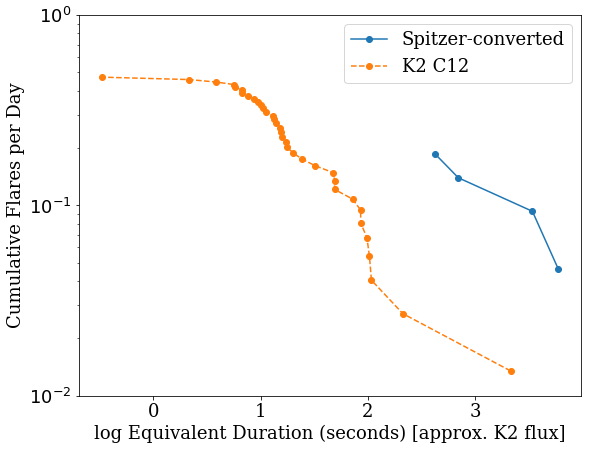

In [18]:
plt.figure(figsize=(9,7))
# plt.plot(ffd_x, ffd_y, '-o', label='Spitzer')
plt.plot(ffd_x2, ffd_y2, '-o', label='Spitzer-converted')
plt.plot(ffd_x_k2, ffd_y_k2, '--o', label='K2 C12')
plt.ylim(1e-2,1e0)
plt.yscale('log')
plt.legend()
plt.xlabel('log Equivalent Duration (seconds) [approx. K2 flux]')
plt.ylabel('Cumulative Flares per Day')
plt.savefig('ffd.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

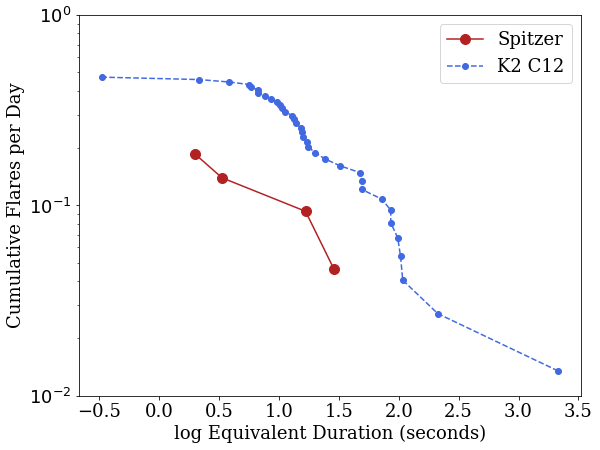

In [19]:
plt.figure(figsize=(9,7))
plt.plot(ffd_x, ffd_y, '-o', label='Spitzer',c='FireBrick', markersize=10)
# plt.plot(ffd_x2, ffd_y2, '-o', label='Spitzer-converted')
plt.plot(ffd_x_k2, ffd_y_k2, '--o', label='K2 C12', c='RoyalBlue' )
plt.ylim(1e-2,1e0)
plt.yscale('log')
plt.legend()
plt.xlabel('log Equivalent Duration (seconds)')
plt.ylabel('Cumulative Flares per Day')
plt.savefig('ffd_ED.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)

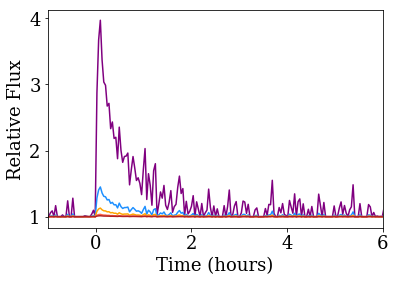

In [20]:
approx_kep1 = np.zeros_like(df['flux'].values)
approx_kep2 = np.zeros_like(df['flux'].values)
approx_kep3 = np.zeros_like(df['flux'].values)


approx_kep4 = np.zeros_like(df['flux'].values)
approx_kep5 = np.zeros_like(df['flux'].values)


for k in range(len(approx_kep)):
    ftmp = flaregrid(2.5 * np.log10(df['flux'].values[k]), filter=filt, sptype=spt)
    approx_kep1[k] = 10.**(ftmp[3] / 2.5)
    approx_kep2[k] = 10.**(ftmp[4] / 2.5)
    approx_kep3[k] = 10.**(ftmp[5] / 2.5)

    approx_kep4[k] = 10.**(ftmp[0] / 2.5)
    approx_kep5[k] = 10.**(ftmp[1] / 2.5)

    
plt.plot((df['time']-7667.125)*24., approx_kep, c='purple', label='Kepler')
plt.plot((df['time']-7667.125)*24., approx_kep1, c='DodgerBlue', label='I')
plt.plot((df['time']-7667.125)*24., approx_kep2, c='orange')
plt.plot((df['time']-7667.125)*24., approx_kep3, c='tomato', label='z')

plt.errorbar((df['time']-7667.125)*24., df['flux'], df['error'], c='firebrick', label='NIR');
plt.xlim(-1,6);
# plt.ylim(.995,1.02);
plt.xlabel('Time (hours)');
plt.ylabel('Relative Flux');
plt.savefig('trappist1_flare3_scale.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

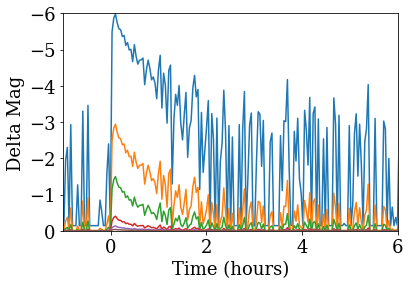

In [21]:


plt.plot((df['time']-7667.125)*24., -2.5*np.log10(approx_kep4))
plt.plot((df['time']-7667.125)*24., -2.5*np.log10(approx_kep5))

plt.plot((df['time']-7667.125)*24., -2.5*np.log10(approx_kep))
plt.plot((df['time']-7667.125)*24., -2.5*np.log10(approx_kep1))
plt.plot((df['time']-7667.125)*24., -2.5*np.log10(approx_kep2))
plt.plot((df['time']-7667.125)*24., -2.5*np.log10(approx_kep3))

# plt.errorbar((df['time']-7667.125)*24., df['flux'], df['error'], c='firebrick', label='NIR');
plt.xlim(-1,6);
plt.ylim(0,-6)
# plt.ylim(.995,1.02);
plt.xlabel('Time (hours)');
plt.ylabel('Delta Mag');
# plt.savefig('trappist1_flare3_scale2.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

## Rough Takeaway
Using the *very bad* assumptions:

- Kepler/K2 filter = SDSS-r
- Spitzer 3.6micron filter = 2MASS Ks
- TRAPPIST-1 is a M6

Simply convert the fluxes for the flare observed in the IR into the optical using the [Davenport+2012](https://arxiv.org/abs/1202.1902) code based on Kowalski model.

If these assumptions are to be trusted (... certainly not fully ...) then the IR flares appear to have *too much* flux to match the frequency distribution seen in the optical with K2. **Indeed, the assumptions used actually push the IR down:**

- Kepler/K2 actually has some significant SDSS g-band flux, probably making r-band a too low approximation
- Spitzer flux is redder than Ks, meaning it implies an even larger optical flare
- TRAPPIST-1 is an M8, meaning the optical response (contrast function) is larger for an IR flare of a given size at later types (Fig 13 of Davenport+2012)

